## Simple Validation Method: Train / Validation / Test

In [26]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
import matplotlib as plt
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [6]:
df2 = pd.read_pickle('cleaned_prj3.pkl')

In [7]:
df2.head()

,supply,Transaction_Fee,Blockreward,Network_utilizatione,block_difficulty
DATE,,,,,
2019-10-01,1.079744e+08,5.105193e+20,13571.0625,0.8166,2449.823
2019-09-30,1.079609e+08,1.014741e+21,13445.5625,0.9369,2461.362
2019-09-29,1.079474e+08,1.131886e+21,13575.6875,0.9567,2451.547
2019-09-28,1.079338e+08,1.214597e+21,13530.6875,0.9522,2475.973
2019-09-27,1.079203e+08,1.239590e+21,13399.1250,0.9134,2483.532


 ## TESTING TO SEE WHICH MODEL IS BEST USING THE PARAMETER 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures



In [10]:
X, y = df2.drop('block_difficulty',axis=1), df2['block_difficulty']


In [11]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)


In [13]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

# what does standardscaler do exactly ? 


In [14]:
lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()


In [15]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')


Linear Regression val R^2: 0.732
Ridge Regression val R^2: 0.864
Degree 2 polynomial regression val R^2: 0.590


##  choosing ridge regression model because of high r^2 score metric 

In [16]:
# choosing regression model because of high r^2 score metric 
lm_reg.fit(X,y)

/Users/shreyakvashisht/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.08161e-44): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [17]:
print(lm_reg.score(X_test, y_test))

0.8632440259465621


In [18]:
lm_reg.predict(X_test_scaled)

array([ 2916.25383622, -4071.87665348,  3808.45437151,  3987.65025223,
        3397.99700002,  3149.43307627, -4056.46313014,  3988.61394363,
        4252.60948664, -2818.38751228, -3681.66589326,   340.86777056,
       -4517.98106038, -4668.28606212,  3899.97320742, -4154.73856444,
       -4243.38868996,  3884.55739433,  2335.28376297,  2263.98596717,
        -568.6510202 ,  4109.04913896,  3947.18391263, -4031.4206816 ,
        3434.62143293, -4504.48396396,  3942.37877213, -1528.27470747,
       -1243.09576119, -4127.76148452, -3963.00616553, -4742.4754577 ,
        2815.08815311, -4182.67938074,  1839.08804455,  2972.14818682,
        3857.57982008, -4511.23798887, -4752.10964068, -3754.89221727,
       -4400.42656672, -4570.01080561,  2277.47438589,  4377.8618522 ,
        3732.33812769, -4321.42179497,  3957.78262395, -4401.39050377,
       -4547.84904627, -4737.65647518, -4547.8404815 , -4389.82792807,
       -4491.00379323,  4202.50791679,  3021.27431483,  3632.13616575,
      

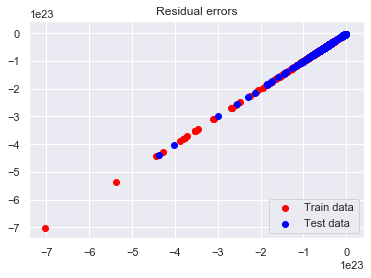

In [35]:
##checking predictions using residuals analysis 
plt.scatter(lm_reg.predict(X_train), lm_reg.predict(X_train) - y_train, color = 'red', label = 'Train data')
plt.scatter(lm_reg.predict(X_test), lm_reg.predict(X_test) - y_test, color = 'blue', label = 'Test data')
plt.hlines(xmin = 0, xmax = 50, y = 0, linewidth = 7)
plt.title('Residual errors')
plt.legend(loc = 4)
plt.show();

## Rigorous Validation Method: Cross-Validation / Test 

In [30]:
X, y = df2.drop('block_difficulty',axis=1), df2['block_difficulty']
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [31]:
X, y = np.array(X), np.array(y)

In [32]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_r2s, cv_lm_reg_r2s = [], [] #collect the validation results for both models

In [33]:
for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=1)

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')

Simple regression scores:  [0.7410956773671913, 0.7386475510808304, 0.7202111919188612, 0.7029566601208942, 0.7118016250989687]
Ridge scores:  [0.8820172390209422, 0.8372678210473545, 0.8883259161544231, 0.8701029353740241, 0.8406456061156907] 

Simple mean cv r^2: 0.723 +- 0.015
Ridge mean cv r^2: 0.864 +- 0.021


In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

lm_reg = Ridge(alpha=10) 
lm_reg.fit(X_scaled,y)
print(f'Ridge Regression test R^2: {lm.score(X_test_scaled, y_test):.3f}')

Ridge Regression test R^2: -44.467


## we already have tried for ridge lets plot residuals for ridge regression changing the value of alpha 

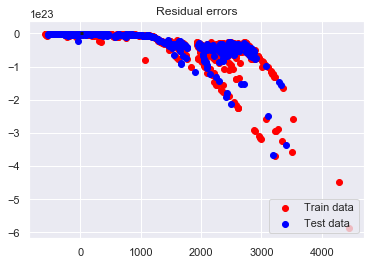

In [39]:
plt.scatter(lm.predict(X_train), lm_reg.predict(X_train) - y_train, color = 'red', label = 'Train data')
plt.scatter(lm.predict(X_test), lm_reg.predict(X_test) - y_test, color = 'blue', label = 'Test data')
plt.hlines(xmin = 0, xmax = 50, y = 0, linewidth = 3)
plt.title('Residual errors')
plt.legend(loc = 4)
plt.show()

## k fold with sci_kit learn 

In [20]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cross_val_score(lm, X, y, cv=kf, scoring='r2')

array([0.74109568, 0.73864755, 0.72021119, 0.70295666, 0.71180163])

In [21]:
kf = KFold(n_splits=5, shuffle=True, random_state = 1000)

print(np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2')))
print(np.mean(cross_val_score(lm_reg, X, y, cv=kf, scoring='r2')))

0.7200189098396852
0.8637077390842312


/Users/shreyakvashisht/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.82446e-44): result may not be accurate.
  overwrite_a=True).T
/Users/shreyakvashisht/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.51498e-44): result may not be accurate.
  overwrite_a=True).T
/Users/shreyakvashisht/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.0175e-44): result may not be accurate.
  overwrite_a=True).T
/Users/shreyakvashisht/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.30168e-44): result may not be accurate.
  overwrite_a=True).T
/Users/shreyakvashisht/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.17204e-44): result may not be accurate

## Regularization 

In [22]:
df2.corr()

,supply,Transaction_Fee,Blockreward,Network_utilizatione,block_difficulty
supply,1.000000,0.489260,-0.800398,0.907488,0.839891
Transaction_Fee,0.489260,1.000000,-0.460553,0.635828,0.543271
Blockreward,-0.800398,-0.460553,1.000000,-0.863434,-0.788653
Network_utilizatione,0.907488,0.635828,-0.863434,1.000000,0.927747
block_difficulty,0.839891,0.543271,-0.788653,0.927747,1.000000


In [23]:
X, y = df2.drop('block_difficulty',axis=1), df2['block_difficulty']
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       block_difficulty   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     976.7
Date:                Fri, 11 Oct 2019   Prob (F-statistic):          6.71e-166
Time:                        17:07:22   Log-Likelihood:                -12645.
No. Observations:                1517   AIC:                         2.529e+04
Df Residuals:                    1515   BIC:                         2.530e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
supply                1.147e-05   3.57e-07     32.108      0.000    1.08e-05    1.22e-05
Transaction_Fee       1.168e-18   5.38e-20     21.715      0.000    1.06e-18    1.27e-18
Blockreward           3.181e-09   9.91e-11     32.108      0.000    2.99e-09    3.38e-09
Network_utilizatione  4.427e-14   1.38e-15     32.108      0.000    4.16e-14     4.7e-14
==============================================================================
Omnibus:                       71.691   Durbin-Watson:                   0.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.259
Skew:                           0.336   Prob(JB):                     1.22e-11
Kurtosis:                       2.415   Cond. No.                     5.23e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.23e+21. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## high condition number, and high multicolinearity lets try regularization 

In [ ]:
# with lasso 

In [64]:
lasso_model = Lasso(alpha = 1000000)
selected_columns = ['supply', 'Transaction_Fee', 'Blockreward', 'Network_utilizatione',
       'block_difficulty']
lasso_model = Lasso(alpha = 1000000) # this is a VERY HIGH regularization strength!, wouldn't usually be used
lasso_model.fit(X_train, y_train)
list(zip(selected_columns, lasso_model.coef_))

[('supply', 9.097802654087747e-05),
 ('Transaction_Fee', 4.0013056225172625e-19)]

### here we can see that lasso has clearly zeored out two big coloumns(Blockreward,Network_utilizatione) ,lets plot a scatter plot to test our results with lasso  

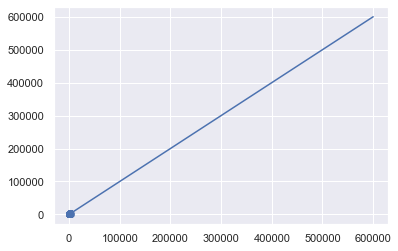

In [65]:
test_set_pred = lasso_model.predict(X_test)
plt.scatter(test_set_pred, y_test, alpha=.1)
plt.plot(np.linspace(0,600000,1000), np.linspace(0,600000,1000))

### lets try to drop the two big columns('Blockreward',''Network_utilizatione' cause of lasso ) and see if our stats model results improve 

In [53]:
df7 = df2.drop(['Blockreward','Network_utilizatione'] ,axis = 1)

In [55]:
X, y = df7.drop('block_difficulty',axis=1), df2['block_difficulty']
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       block_difficulty   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     976.7
Date:                Fri, 11 Oct 2019   Prob (F-statistic):          6.71e-166
Time:                        22:13:30   Log-Likelihood:                -12645.
No. Observations:                1517   AIC:                         2.529e+04
Df Residuals:                    1515   BIC:                         2.530e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
supply           1.147e-05   3.57e-07     32.108      0.000    1.08e-05    1.22e-05
Transaction_Fee  1.168e-18   5.38e-20     21.715      0.000    1.06e-18    1.27e-18
==============================================================================
Omnibus:                       71.691   Durbin-Watson:                   0.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.259
Skew:                           0.336   Prob(JB):                     1.22e-11
Kurtosis:                       2.415   Cond. No.                     8.53e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### significant change in the multicolinarity 

### plotting a residual of our chaged data set with the help of ridge regression to check for better results 


In [ ]:
### trying to change the mteric to mean squraed error 

Ridge Regression val R^2: 0.732


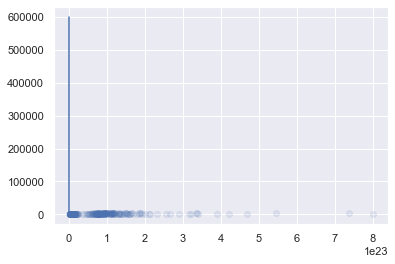

In [66]:
X, y = df7.drop('block_difficulty',axis=1), df2['block_difficulty']
X, X_test1, y, y_test1 = train_test_split(X, y, test_size=.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)
lm_reg = Ridge(alpha=1)

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')


test_set_pred = lm_reg.predict(X_test1)
plt.scatter(test_set_pred, y_test1, alpha=.1)
plt.plot(np.linspace(0,600000,1000), np.linspace(0,600000,1000))


## changing the metric to MSE with diffrent values for alphas for comaprison using  GridSearchcv

In [71]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

params={'alpha': [.5,1,50,75,300,500,1000,50000]}
rdg_reg = Ridge()
clf = GridSearchCV(rdg_reg,params,cv=2,verbose = 1, scoring = 'neg_mean_squared_error')
clf.fit(X_train_scaled,y_train)

clf.best_params_
#{'alpha': 4}

z = pd.DataFrame(clf.cv_results_)
z

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001825,0.000313,0.000445,0.000033,0.5,{'alpha': 0.5},-4.720100e+05,-4.720630e+05,-4.720365e+05,26.487266,2
1,0.001208,0.000006,0.000428,0.000004,1,{'alpha': 1},-4.721416e+05,-4.718903e+05,-4.720161e+05,125.656357,1
2,0.001111,0.000020,0.000377,0.000038,50,{'alpha': 50},-4.912058e+05,-4.686449e+05,-4.799378e+05,11280.425886,3
3,0.000945,0.000037,0.000425,0.000047,75,{'alpha': 75},-5.040930e+05,-4.742102e+05,-4.891680e+05,14941.376972,4
4,0.001069,0.000075,0.000414,0.000003,300,{'alpha': 300},-6.427624e+05,-5.923782e+05,-6.175980e+05,25192.109656,5
5,0.001032,0.000045,0.000467,0.000028,500,{'alpha': 500},-7.573049e+05,-7.086872e+05,-7.330228e+05,24308.816163,6
6,0.001180,0.000048,0.000415,0.000002,1000,{'alpha': 1000},-9.688651e+05,-9.310482e+05,-9.499774e+05,18908.420635,7
7,0.001761,0.000491,0.000375,0.000081,50000,{'alpha': 50000},-1.657282e+06,-1.643121e+06,-1.650210e+06,7080.700940,8


#### really high values for mse 

In [74]:
z['split0_test_score'].tolist()

[-472010.032726484,
 -472141.60306766664,
 -491205.81084760954,
 -504092.98561296606,
 -642762.4379897007,
 -757304.897651706,
 -968865.079211021,
 -1657282.4708372806]

## RMSE

In [79]:
s = list(m['split0_test_score'])
s
for i in s:
    print((i*-1)**0.5)

687.0298630528981
687.1256093813319
700.8607642375264
709.9950602736375
801.7246647008565
870.2326686879239
984.3094428130927
1287.3548348599468


In [81]:
y_pred = lm_reg.predict(X_test_scaled)
k= y_pred[0:30]
k

array([2732.59496228,  316.01683239, 2396.49468039, 2736.56698938,
       2641.45855071, 1874.48557239,  935.50860519, 2834.80873204,
       2784.30733774, 1225.48471781,  456.38422175, 1647.22165578,
        -79.60489498, -212.16872865, 2763.19829605,  947.55153554,
       -132.28702204, 2812.12279218, 2334.2569236 , 1955.23943704,
       1465.2714861 , 2591.00525207, 2828.66161868, -192.75302126,
       1992.87726736,  122.18778931, 2341.04177852,  612.72067297,
       1456.05122556,  982.172867  ])

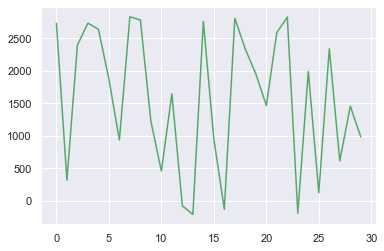

In [82]:
import matplotlib.pyplot as plt
plt.plot(k, color = 'g'); 

# Final conculsion 


## ridge regression with feature selection is probably the best model for such a type of prediction 
## supply has no effect on mining the block diffciulty (opposed to what was prev, thought)
## the best bet to predict diffciulty of a block chain is to use network utilization with some other unknown features 

# pwd